In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics
from scipy.optimize import minimize

from sklearn import set_config
import seaborn as sns
set_config("diagram")
from sklearn.tree import export_text
from sklearn.tree import plot_tree

## Data Exploration (Preprocessing)

In [14]:
column_names = [
    "id", "clump_thickness", "uniformity_of_cell_size", "uniformity_of_cell_shape",
    "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei",
    "bland_chromatin", "normal_nucleoli", "mitoses", "class"
]

file_path = "D:/Data/breast_cancer_wisconsin/breast-cancer-wisconsin.data"
df = pd.read_csv(file_path, names=column_names, header=None)

df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'], errors='coerce')
df = df.dropna()
df.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [21]:
df.shape

(683, 11)

In [23]:
df['class'].unique()

array([2, 4], dtype=int64)

## Data Visualization

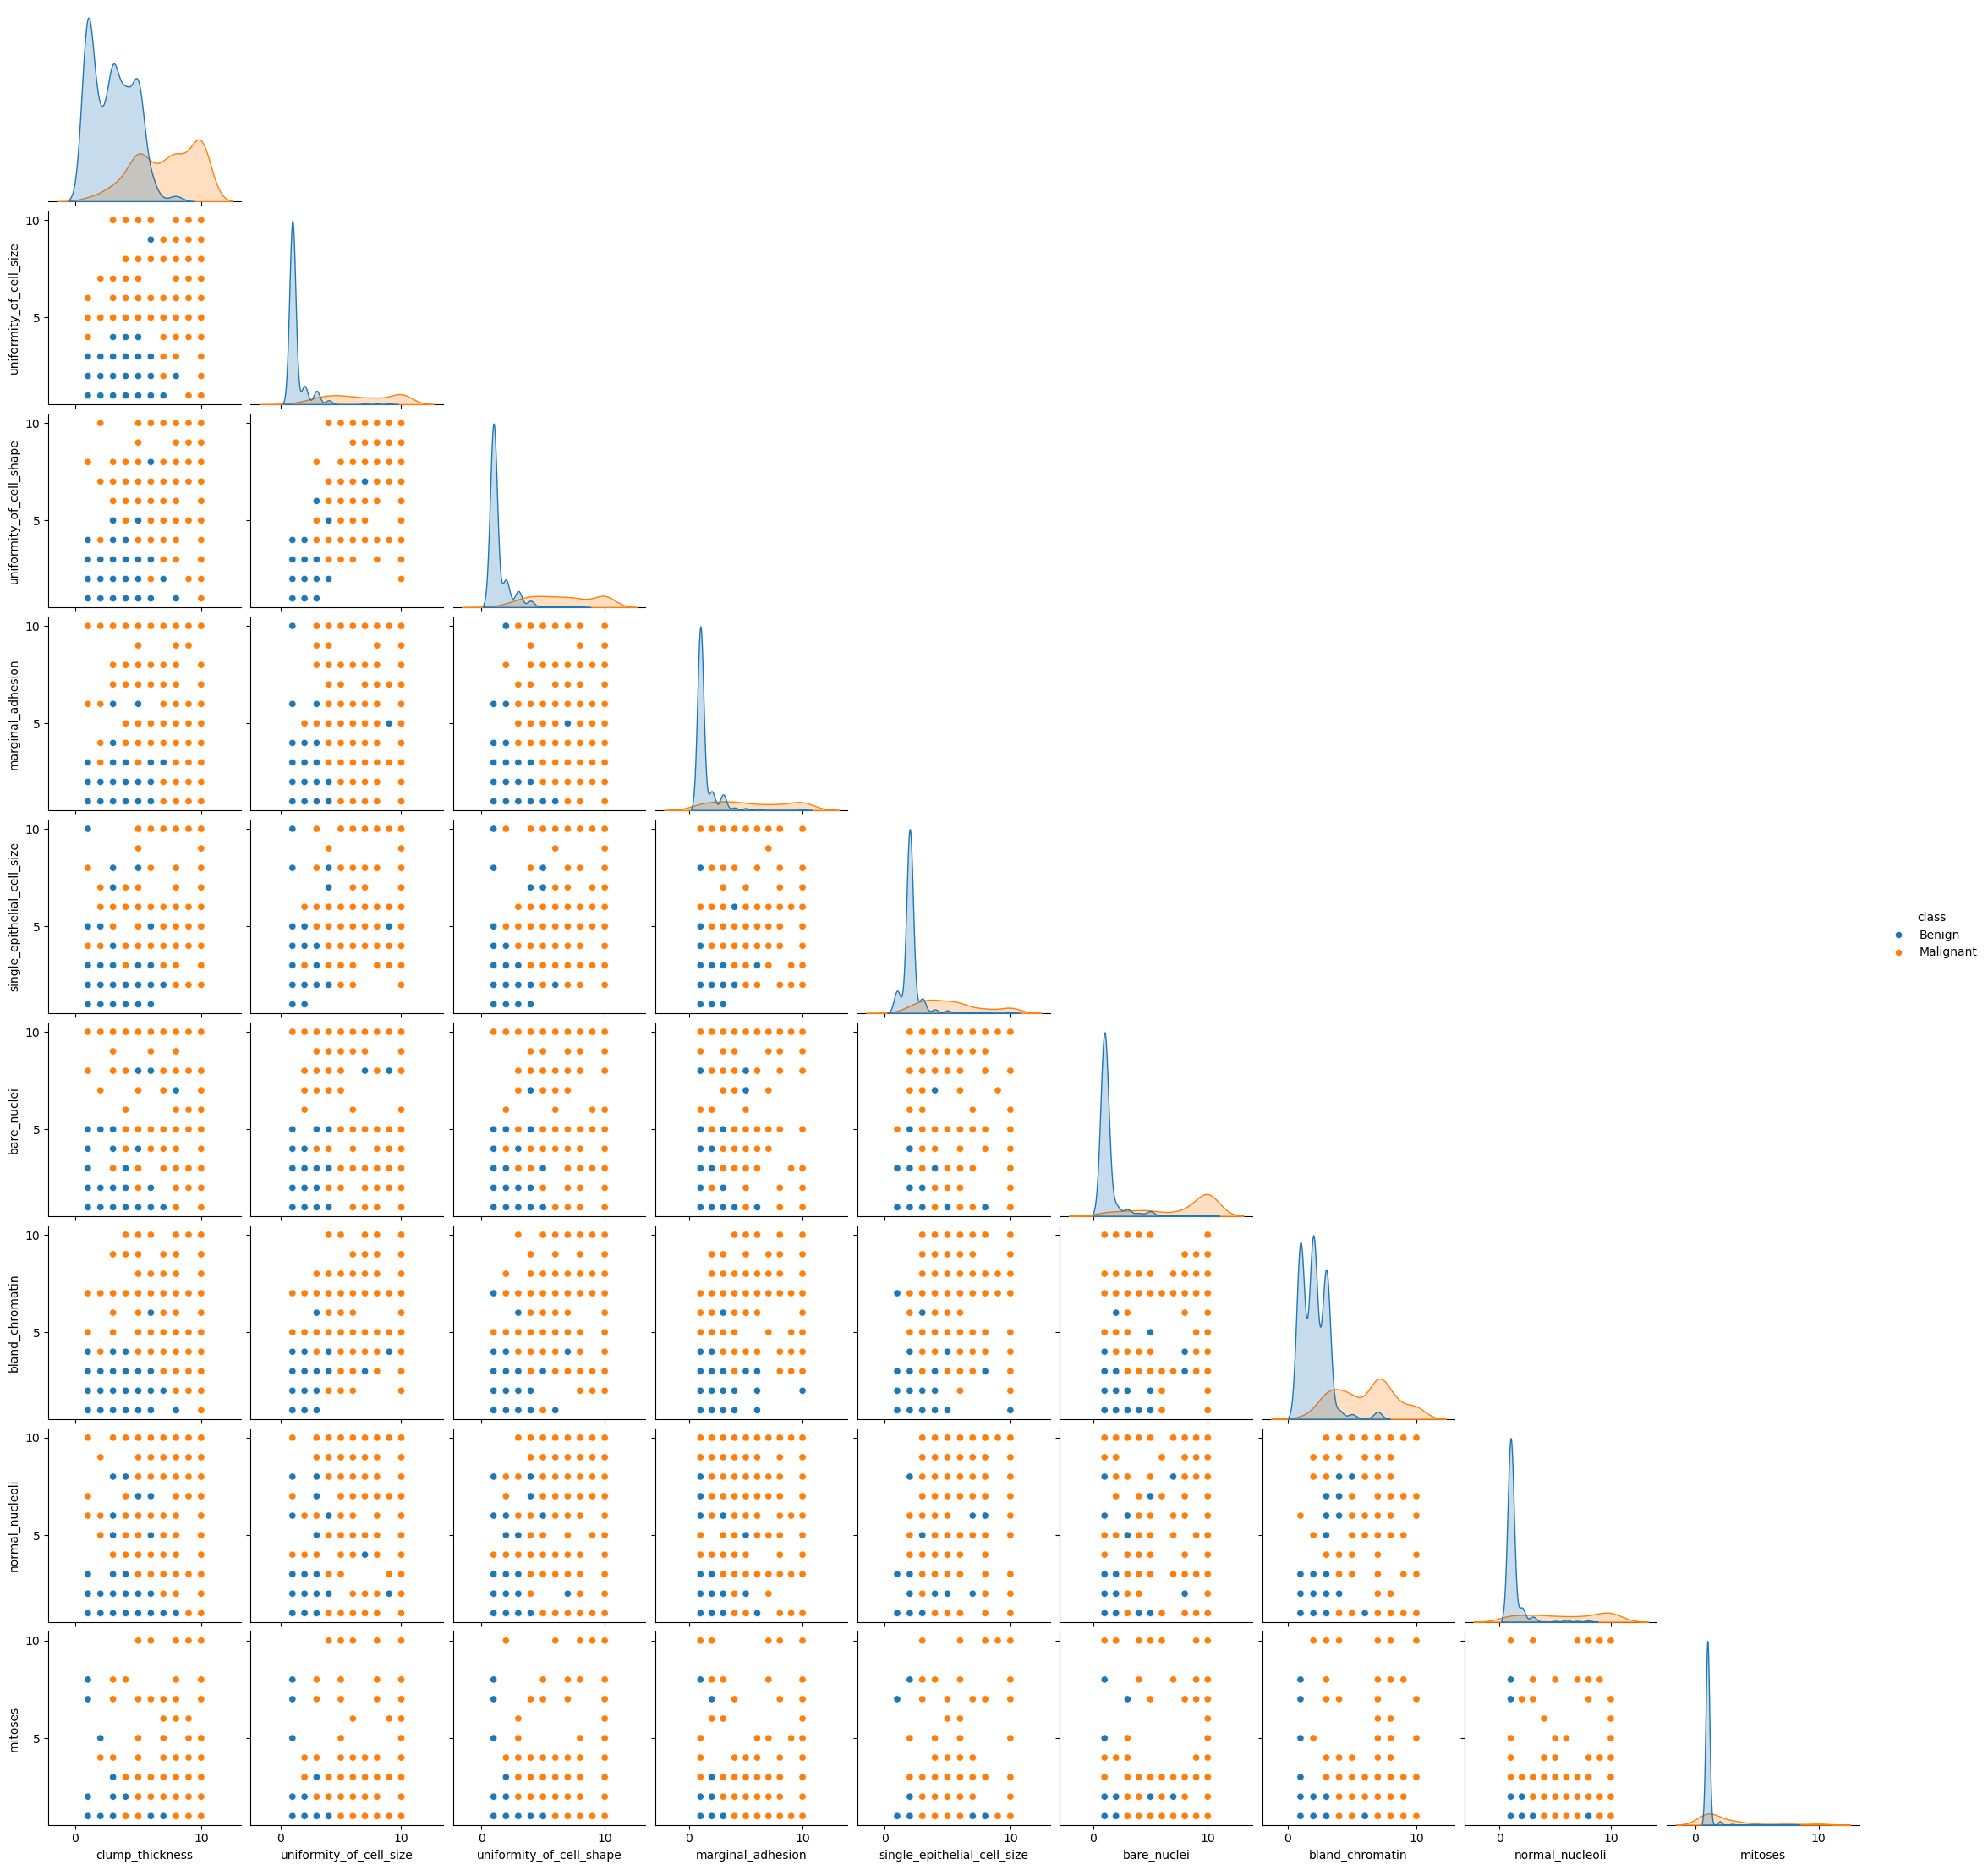

In [30]:
#Pairwise plot
df_plot = df.drop(columns=["id"])
df_plot["class"] = df_plot["class"].map({2: "Benign", 4: "Malignant"})

sns.pairplot(df_plot, hue = 'class', corner=True)
plt.savefig('D:/PythonProject/Pictures/cancer_pairplot.png', dpi = 300)
plt.rcParams.update({'font.size': 23})
plt.rcParams['font.family'] = 'Times New Roman'

In [47]:
column_names = [
    "id", "clump_thickness", "uniformity_of_cell_size", "uniformity_of_cell_shape",
    "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei",
    "bland_chromatin", "normal_nucleoli", "mitoses", "class"
]

file_path = "D:/Data/breast_cancer_wisconsin/breast-cancer-wisconsin.data"
df = pd.read_csv(file_path, names=column_names, header=None)


df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'], errors='coerce')
df = df.dropna()

df['class'] = df['class'].map({2: 0, 4: 1})

X = df.iloc[:, 1:-1]
y = df['class']

clf = DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2, random_state=42)
clf.fit(X, y)

tree_ = clf.tree_
first_feature_index = tree_.feature[0] 
first_threshold = tree_.threshold[0]     

feature_name = X.columns[first_feature_index]
print("Feature selected for the first split:", feature_name)
print("Decision boundary value:", first_threshold)

def entropy(y_arr):
    counts = np.bincount(y_arr.astype(int))
    probs = counts / len(y_arr)
    return -np.sum([p * np.log2(p) if p > 0 else 0 for p in probs])

def gini_index(y_arr):
    counts = np.bincount(y_arr.astype(int))
    probs = counts / len(y_arr)
    return 1 - np.sum(probs ** 2)

def misclassification_error(y_arr):
    counts = np.bincount(y_arr.astype(int))
    probs = counts / len(y_arr)
    return 1 - np.max(probs)

entropy_root = entropy(y.values)
gini_root = gini_index(y.values)
error_root = misclassification_error(y.values)

X_vals = X.values
left_mask = X_vals[:, first_feature_index] <= first_threshold
right_mask = X_vals[:, first_feature_index] > first_threshold

y_left = y.values[left_mask]
y_right = y.values[right_mask]

entropy_left = entropy(y_left)
entropy_right = entropy(y_right)
gini_left = gini_index(y_left)
gini_right = gini_index(y_right)
error_left = misclassification_error(y_left)
error_right = misclassification_error(y_right)

n = len(y)
n_left = len(y_left)
n_right = len(y_right)

weighted_entropy = (n_left / n) * entropy_left + (n_right / n) * entropy_right
weighted_gini = (n_left / n) * gini_left + (n_right / n) * gini_right
weighted_error = (n_left / n) * error_left + (n_right / n) * error_right

info_gain_entropy = entropy_root - weighted_entropy
info_gain_gini = gini_root - weighted_gini
info_gain_error = error_root - weighted_error

print("\nRoot metrics：")
print("Entropy:", entropy_root)
print("Gini:", gini_root)
print("Misclassification Error:", error_root)

print("\nWeighted average metrics after splitting:")
print("Weighted Entropy:", weighted_entropy)
print("Weighted Gini:", weighted_gini)
print("Weighted Misclassification Error:", weighted_error)

print("\nInformation Gain:")
print("Information Gain based on Entropy:", info_gain_entropy)
print("Information Gain based on Gini:", info_gain_gini)
print("Information Gain based on Misclassification Error:", info_gain_error)


Feature selected for the first split: uniformity_of_cell_size
Decision boundary value: 2.5

Root metrics：
Entropy: 0.9340026588217948
Gini: 0.4549560654163335
Misclassification Error: 0.34992679355783307

Weighted average metrics after splitting:
Weighted Entropy: 0.345083892097333
Weighted Gini: 0.12944786468102762
Weighted Misclassification Error: 0.07320644216691069

Information Gain:
Information Gain based on Entropy: 0.5889187667244618
Information Gain based on Gini: 0.32550820073530584
Information Gain based on Misclassification Error: 0.2767203513909224


## Plot Tree

In [39]:
# print feature importances
print(dict(zip(X.columns, clf.feature_importances_)))

{'clump_thickness': 0.0, 'uniformity_of_cell_size': 0.8732669526483047, 'uniformity_of_cell_shape': 0.08084314555096363, 'marginal_adhesion': 0.0, 'single_epithelial_cell_size': 0.0, 'bare_nuclei': 0.04588990180073172, 'bland_chromatin': 0.0, 'normal_nucleoli': 0.0, 'mitoses': 0.0}


In [35]:
tree = export_text(clf, feature_names = list(X.columns))
print(tree)

|--- uniformity_of_cell_size <= 2.50
|   |--- bare_nuclei <= 5.50
|   |   |--- class: 0
|   |--- bare_nuclei >  5.50
|   |   |--- class: 1
|--- uniformity_of_cell_size >  2.50
|   |--- uniformity_of_cell_shape <= 2.50
|   |   |--- class: 0
|   |--- uniformity_of_cell_shape >  2.50
|   |   |--- class: 1



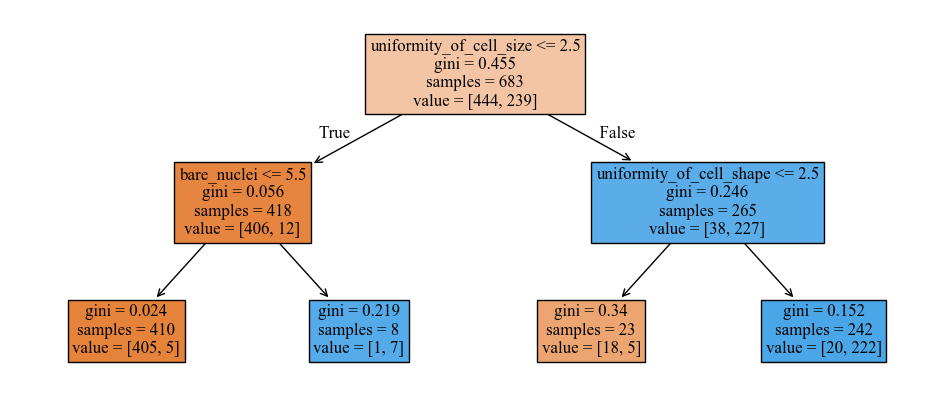

In [65]:
#plot tree
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(12, 5))
treePlot = plot_tree(clf, feature_names=list(X.columns), filled = True)
treePlot;
plt.savefig('D:/PythonProject/Pictures/treeplot2.png', dpi = 300)